Problem Statement:
    
    We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.?

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Doctor_fee_consultation..xlsx')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,2352
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,1653
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,2063
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,2541


In [3]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

Their are 6 columns with object data type and 1 with int64 data type.

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

In [4]:
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [5]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine',
       'MBBS, MS - General Surgery, FAIS, FIAGES',
       'MBBS, MD / MS - Obstetrics & Gynaecology'], dtype=object)

In [6]:
df['Experience'] = df['Experience'].str.replace('years experience','').astype(int)

In [7]:
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23,NaN,"Athani, Ernakulam",Dentist,NaN,100


Data Preprocessing is done for 'Experience' column.

In [8]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                     0
dtype: int64

Their are 4392 missing values in Rating column, 31 in 'Place' column and 3454 missing values in 'Misccellaneous_Info' column.

In [9]:
df['Rating'].value_counts()

100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
90%      95
92%      95
91%      86
88%      54
89%      53
85%      35
82%      32
83%      32
86%      27
80%      26
87%      25
84%      20
77%      17
67%      17
71%      16
79%      15
81%      15
73%      13
76%      13
60%      11
75%       8
70%       8
74%       7
78%       7
69%       6
56%       5
68%       5
55%       5
64%       4
72%       3
57%       3
53%       2
62%       2
65%       2
63%       2
33%       2
7%        1
47%       1
40%       1
58%       1
48%       1
52%       1
36%       1
45%       1
Name: Rating, dtype: int64

In [10]:
df['Rating'].isnull().sum()

4392

In [11]:
df['Rating'].fillna('0%',inplace = True)
df['Rating'] = df['Rating'].str[0:-1].astype(float)

In [12]:
df['Rating']

0       100.0
1        98.0
2         0.0
3         0.0
4       100.0
        ...  
7943      0.0
7944      0.0
7945      0.0
7946     98.0
7947      0.0
Name: Rating, Length: 7948, dtype: float64

so, for rating  column, we replaced all the missing values by 0% and then converted all the % values to float for further operations.

In [13]:
df['Rating'].isnull().sum()

0

In [14]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                     0
dtype: int64

In [15]:
df['Place'].value_counts()

HSR Layout, Bangalore              97
Andheri West, Mumbai               97
Dwarka, Delhi                      93
Banjara Hills, Hyderabad           85
Mulund West, Mumbai                81
                                   ..
Model Town 3, Delhi                 1
Nettoor, Ernakulam                  1
Sewri, Mumbai                       1
Satya Niketan, Delhi                1
Perumathura, Thiruvananthapuram     1
Name: Place, Length: 948, dtype: int64

In [16]:
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8,0.0,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42,0.0,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10,99.0,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14,0.0,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23,0.0,"Athani, Ernakulam",Dentist,NaN,100


In [17]:
df['Place'].value_counts()

HSR Layout, Bangalore              97
Andheri West, Mumbai               97
Dwarka, Delhi                      93
Banjara Hills, Hyderabad           85
Mulund West, Mumbai                81
                                   ..
Model Town 3, Delhi                 1
Nettoor, Ernakulam                  1
Sewri, Mumbai                       1
Satya Niketan, Delhi                1
Perumathura, Thiruvananthapuram     1
Name: Place, Length: 948, dtype: int64

In [18]:
df.dtypes

Qualification          object
Experience              int32
Rating                float64
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                    int64
dtype: object

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [21]:
df['Place']=imp.fit_transform(df['Place'].values.reshape(-1,1))


In [22]:
df.dtypes

Qualification          object
Experience              int32
Rating                float64
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                    int64
dtype: object

In [23]:
df['Miscellaneous_Info']=imp.fit_transform(df['Miscellaneous_Info'].values.reshape(-1,1))

In [24]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

So, their are no null values in the dataset as we converted the missing values from 'Place' and 'Miscellaneous_Info' column using 'most_frequent' strategy.

In [25]:
df.describe()

,Experience,Rating,Fees
count,7948.000000,7948.000000,7948.000000
mean,17.446653,42.321465,718.982008
std,11.201217,47.324081,751.717502
min,0.000000,0.000000,5.000000
25%,9.000000,0.000000,200.000000
50%,15.000000,0.000000,400.000000
75%,23.000000,96.000000,991.500000
max,66.000000,100.000000,3031.000000


We got statistical summary for 3 columns only as other columns are of object data type.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

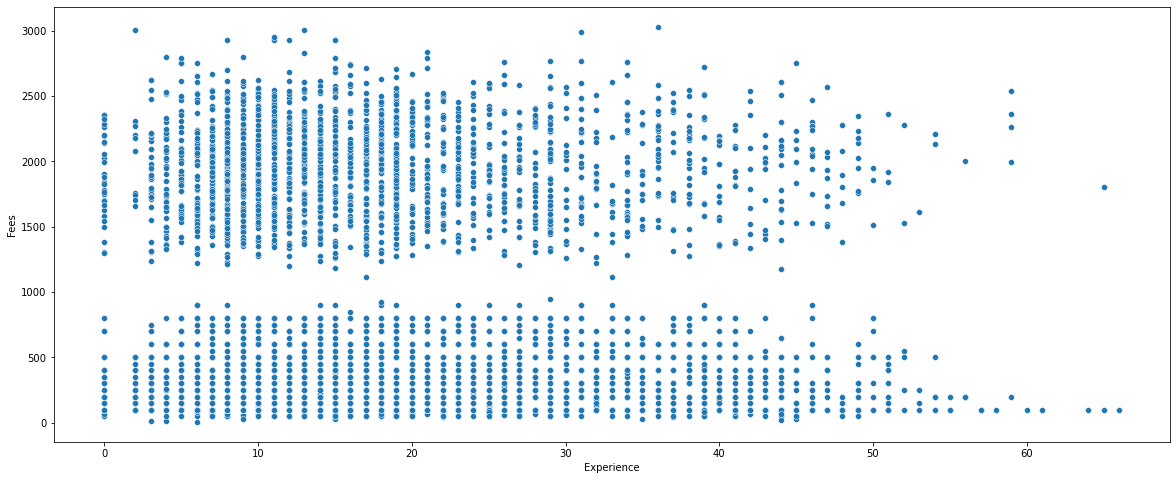

In [27]:
plt.figure(figsize=[20,8])
sns.scatterplot(df['Experience'],df['Fees'])
plt.show()

Fees are very high for the Doctors whose age is in between the range of 30 to 40 years. 
mixture of increasing and decreasing trend.

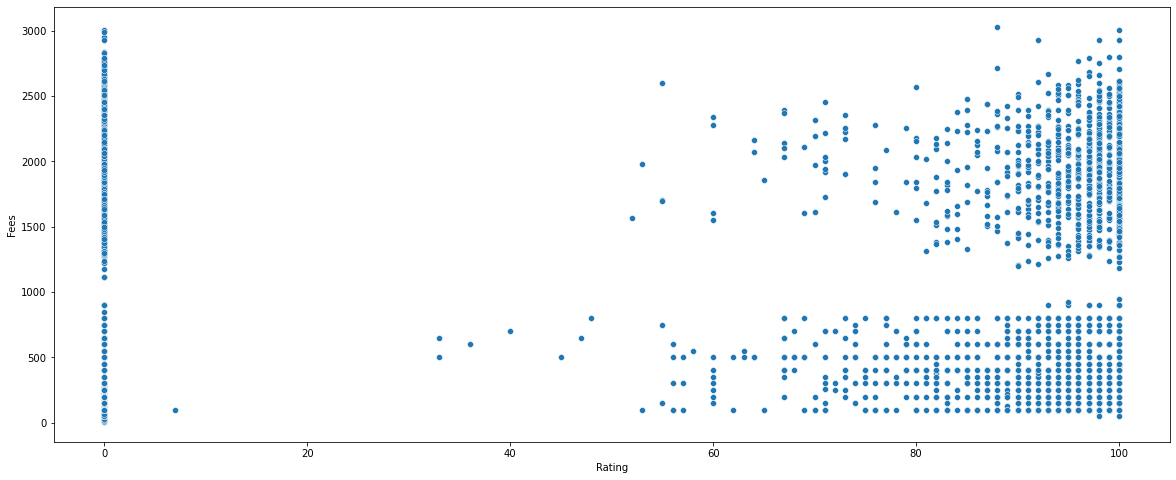

In [28]:
plt.figure(figsize=[20,8])
sns.scatterplot(df['Rating'],df['Fees'])
plt.show()

Highest fees is for the rating in range of 80 to 100.

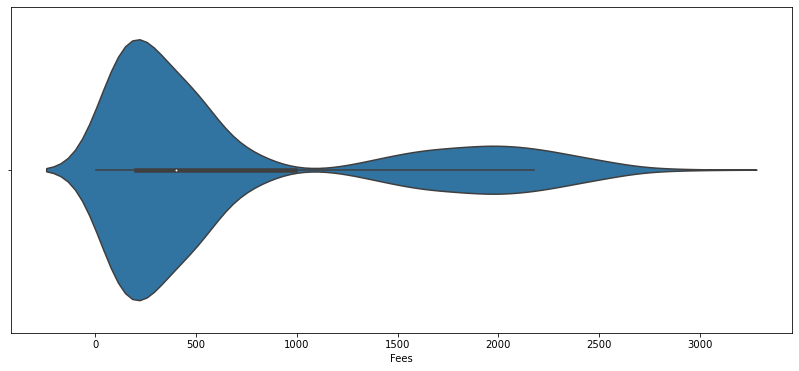

In [29]:
plt.figure(figsize=[14,6])
sns.violinplot(df['Fees'])
plt.show()


Average highest fees range is 1500 to 2800.

Average lowest fees is in the range 200 to 500.

<AxesSubplot:>

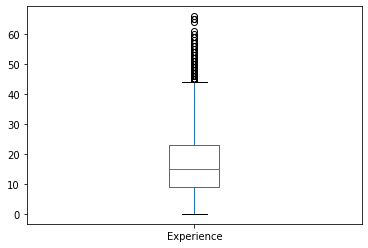

In [30]:
df['Experience'].plot.box()

Their are outliers in 'Experience Column'.

<AxesSubplot:>

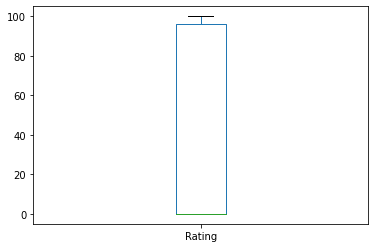

In [31]:
df['Rating'].plot.box()

No outliers in rating column.

<AxesSubplot:>

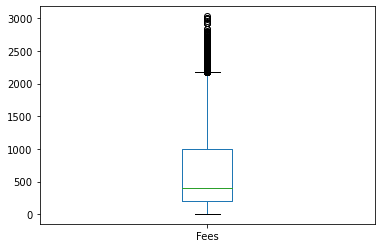

In [32]:
df['Fees'].plot.box()

Their are outliers in fees column.

lets check the distribution for 'Fees' and 'Experience' column.

<AxesSubplot:xlabel='Experience', ylabel='Density'>

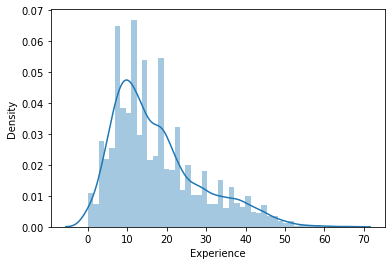

In [33]:
sns.distplot(df['Experience'])

Data is not normally distributed.(right Skewed)

In [34]:
df['Experience'].describe()

count    7948.000000
mean       17.446653
std        11.201217
min         0.000000
25%         9.000000
50%        15.000000
75%        23.000000
max        66.000000
Name: Experience, dtype: float64

In [35]:
#Lets compute IQR to calculate boundaries.

IQR=df.Experience.quantile(0.75)-df.Experience.quantile(0.25)
IQR

14.0

In [36]:
#Extreme outliers

lower_bridge=df['Experience'].quantile(0.25)-(IQR*3)
upper_bridge=df['Experience'].quantile(0.75)+(IQR*3)

In [37]:
print(upper_bridge),print(lower_bridge)

65.0
-33.0


(None, None)

In [38]:
df.loc[df['Experience']>=65,'Experience']=65

In [39]:
df['Experience'].describe()

count    7948.000000
mean       17.446527
std        11.200677
min         0.000000
25%         9.000000
50%        15.000000
75%        23.000000
max        65.000000
Name: Experience, dtype: float64

Where Experience is greater than 65 years, replace it by 65.

<AxesSubplot:xlabel='Fees', ylabel='Density'>

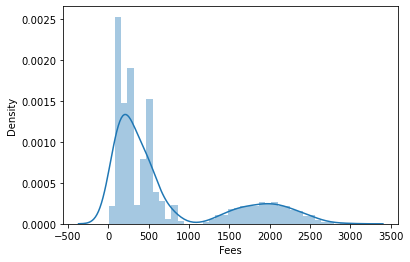

In [40]:
sns.distplot(df['Fees'])

In [41]:
df['Fees'].describe()

count    7948.000000
mean      718.982008
std       751.717502
min         5.000000
25%       200.000000
50%       400.000000
75%       991.500000
max      3031.000000
Name: Fees, dtype: float64

In [42]:
Upper_boundary=df['Fees'].mean()+3*df['Fees'].std()
Lower_boundary=df['Fees'].mean()-3*df['Fees'].std()


In [43]:
print(Lower_boundary)
print(Upper_boundary)
print(df['Fees'].mean())

-1536.1704993716783
2974.1345154763585
718.9820080523402


In [44]:
df.loc[df['Fees']>=2975,'Fees']=2975

In [45]:
df['Fees'].describe()

count    7948.000000
mean      718.965778
std       751.668362
min         5.000000
25%       200.000000
50%       400.000000
75%       991.500000
max      2975.000000
Name: Fees, dtype: float64

Where Fees is greater than 2975, replace it by 2975.

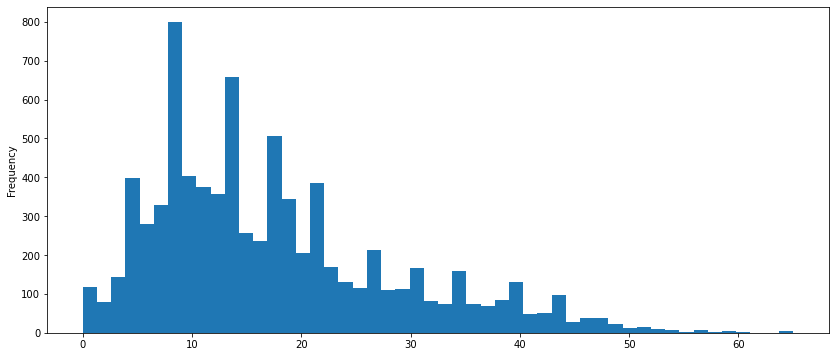

In [46]:
plt.figure(figsize=[14,6])
df['Experience'].plot.hist(bins=50)
plt.show()

More number of doctors are their in the dataset, whose exp is between 0 to 10 years.

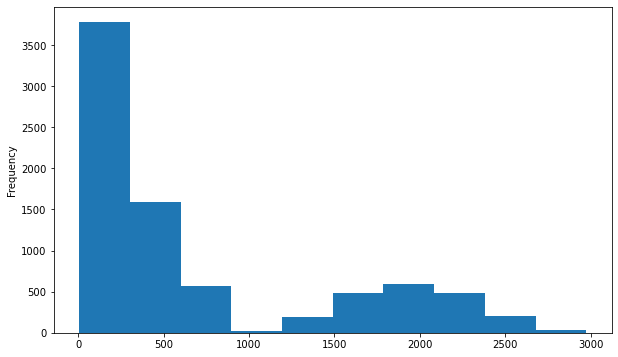

In [47]:
plt.figure(figsize=[10,6])
df['Fees'].plot.hist(bins=10)
plt.show()

More than 3500 doctors charges are very low as comapre to others.

For Further process, lets convert all the object data type into int data type to proceed further operations.

In [48]:
df.dtypes

Qualification          object
Experience              int32
Rating                float64
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                    int64
dtype: object

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
list_1=['Qualification','Place','Profile','Miscellaneous_Info']

In [52]:
for val in list_1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,491,24,100.0,327,5,188,100
1,92,12,98.0,936,0,1951,350
2,1442,9,0.0,499,3,2174,300
3,572,12,0.0,74,0,2299,250
4,16,20,100.0,369,0,341,250
...,...,...,...,...,...,...,...
7943,64,10,0.0,76,0,2174,2352
7944,1561,4,0.0,135,2,2174,1653
7945,1344,9,0.0,664,4,2174,2063
7946,168,12,98.0,34,1,3573,2541


In [53]:
df.dtypes

Qualification           int32
Experience              int32
Rating                float64
Place                   int32
Profile                 int32
Miscellaneous_Info      int32
Fees                    int64
dtype: object

In [54]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000
mean,756.032461,17.446527,42.321465,449.755788,2.458606,2119.708228,718.965778
std,525.721528,11.200677,47.324081,281.730710,1.657217,855.842802,751.668362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,284.750000,9.000000,0.000000,209.750000,1.000000,1961.750000,200.000000
50%,749.000000,15.000000,0.000000,443.000000,2.000000,2174.000000,400.000000
75%,1193.000000,23.000000,96.000000,682.000000,4.000000,2352.250000,991.500000
max,1800.000000,65.000000,100.000000,947.000000,5.000000,3979.000000,2975.000000


Above is the statistical summary of the dataset, which tell us about the mean, median, std., of every column.

In [55]:
#checking correlation

corr_mat=df.corr()
corr_mat

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
Qualification,1.000000,0.129719,0.028861,0.010506,0.386709,-0.136725,0.056500
Experience,0.129719,1.000000,-0.033521,0.026133,0.190225,-0.125991,0.022431
Rating,0.028861,-0.033521,1.000000,-0.035696,-0.128273,-0.261313,0.032577
Place,0.010506,0.026133,-0.035696,1.000000,0.014900,0.030523,-0.007945
Profile,0.386709,0.190225,-0.128273,0.014900,1.000000,-0.159883,0.041426
Miscellaneous_Info,-0.136725,-0.125991,-0.261313,0.030523,-0.159883,1.000000,-0.031571
Fees,0.056500,0.022431,0.032577,-0.007945,0.041426,-0.031571,1.000000


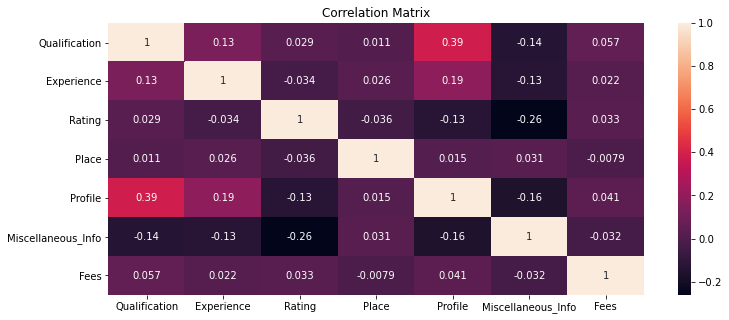

In [56]:
plt.figure(figsize=[12,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

Their is negative as well as positive correlation is found in the dataset against each column.

In [57]:
corr_matrix=df.corr()
corr_matrix['Fees'].sort_values(ascending=False)

Fees                  1.000000
Qualification         0.056500
Profile               0.041426
Rating                0.032577
Experience            0.022431
Place                -0.007945
Miscellaneous_Info   -0.031571
Name: Fees, dtype: float64

Highest correlated column - Qualification

Lowest Correlated Column - Miscellaneous_info

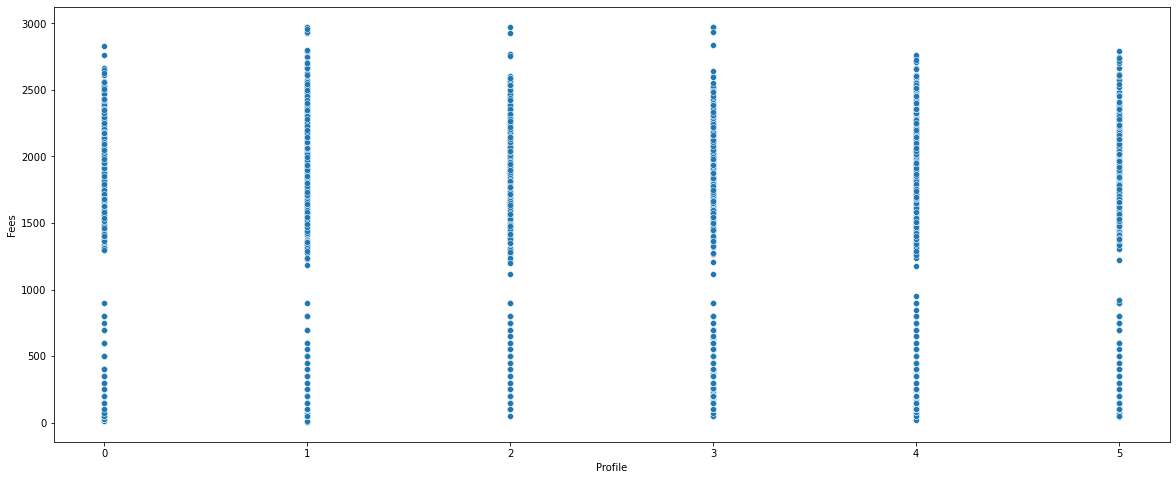

In [58]:
plt.figure(figsize=[20,8])
sns.scatterplot(df['Profile'],df['Fees'])
plt.show()

Highest Fees charged by the profiles-General Medicine,Dermatologists,Homeopath     

Spliting the dataset into x and y

In [59]:
x=df.drop('Fees',axis=1)
y=df['Fees']

In [60]:
x

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,491,24,100.0,327,5,188
1,92,12,98.0,936,0,1951
2,1442,9,0.0,499,3,2174
3,572,12,0.0,74,0,2299
4,16,20,100.0,369,0,341
...,...,...,...,...,...,...
7943,64,10,0.0,76,0,2174
7944,1561,4,0.0,135,2,2174
7945,1344,9,0.0,664,4,2174
7946,168,12,98.0,34,1,3573


In [61]:
y

0        100
1        350
2        300
3        250
4        250
        ... 
7943    2352
7944    1653
7945    2063
7946    2541
7947    1633
Name: Fees, Length: 7948, dtype: int64

In [62]:
#checking Skewness

x.skew()

Qualification         0.247541
Experience            0.983780
Rating                0.241674
Place                 0.108592
Profile               0.088789
Miscellaneous_Info   -0.306820
dtype: float64

Their is skewness in one column, Experience.

In [63]:
x['Experience']=np.sqrt(x['Experience'])

In [64]:
x.skew()

Qualification         0.247541
Experience            0.073571
Rating                0.241674
Place                 0.108592
Profile               0.088789
Miscellaneous_Info   -0.306820
dtype: float64

Skewness is removed for 'Experience' column. lets proceed for further operations.

In [67]:
x

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,491,4.898979,100.0,327,5,188
1,92,3.464102,98.0,936,0,1951
2,1442,3.000000,0.0,499,3,2174
3,572,3.464102,0.0,74,0,2299
4,16,4.472136,100.0,369,0,341
...,...,...,...,...,...,...
7943,64,3.162278,0.0,76,0,2174
7944,1561,2.000000,0.0,135,2,2174
7945,1344,3.000000,0.0,664,4,2174
7946,168,3.464102,98.0,34,1,3573


In [68]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc=StandardScaler()
X=sc.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)

In [71]:
X

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,-0.504163,0.698473,1.218876,-0.435748,1.533628,-2.257225
1,-1.263167,-0.357106,1.176611,1.726027,-1.483669,-0.197138
2,1.304894,-0.698526,-0.894347,0.174803,0.326709,0.063441
3,-0.350079,-0.357106,-0.894347,-1.333825,-1.483669,0.209505
4,-1.407740,0.384462,1.218876,-0.286660,-1.483669,-2.078443
...,...,...,...,...,...,...
7943,-1.316431,-0.579146,-0.894347,-1.326725,-1.483669,0.063441
7944,1.531263,-1.434184,-0.894347,-1.117292,-0.276750,0.063441
7945,1.118471,-0.698526,-0.894347,0.760505,0.930169,0.063441
7946,-1.118595,-0.357106,1.176611,-1.475813,-0.880209,1.698189


Skewness is removed and data is scaled.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error



In [76]:
#finding best random_state
maxr2_score=0
maxRs=0
for i in range(1,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(X_train,y_train)
    pred=LR.predict(X_test)
    r_2=r2_score(y_test,pred)
    if r_2>maxr2_score:
    
        maxr2_score=r_2
        maxRs=i
        
print("Best r2_score is", maxr2_score,"on Random state", maxRs)    

Best r2_score is 0.008713549396384024 on Random state 98


In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=98)

In [78]:
LR=LinearRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_test)
print(r2_score(y_test,pred))

print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.008713549396384024
561751.8144737663
Root mean squared Error: 749.5010436775697


In [79]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)
print(r2_score(y_test,pred))

print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

-1.064041385828712
1169670.9794955777
Root mean squared Error: 1081.5132821632742


In [80]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(r2_score(y_test,pred))

print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

-0.08809457291829248
616611.9795985426
Root mean squared Error: 785.2464451358838


In [82]:
svr=SVR()
svr.fit(X_train,y_train)
pred=svr.predict(X_test)

print(r2_score(y_test,pred))

print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

-0.19370419514237058
676459.8640058596
Root mean squared Error: 822.4718013438878


Saving the best model.

In [92]:
import joblib

In [93]:
joblib.dump(LR,'Fees.pkl')

['Fees.pkl']

In [94]:
D_model=joblib.load('Fees.pkl')

In [97]:
prediction=D_model.predict(X_test)
prediction

array([685.87264433, 768.48372885, 689.7497429 , ..., 693.13195091,
       725.42208459, 681.92130622])

So, we got the lowest RMSE for LinearRegression Model, we saved the model.